# Plant Disease Prediction

## Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 7771 files belonging to 4 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1943 files belonging to 4 classes.


## Model Building Using MobilenetV2

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Parameters
IMAGE_SIZE = 128
BATCH_SIZE = 32
NUM_CLASSES = 4  # Update this based on your dataset
EPOCHS = 10

# Load pre-trained MobileNetV2 model (without top layer)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.25)(x)
x = Dense(1500, activation='relu')(x)
x = Dropout(0.4)(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)

# Build the full model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

# Image data generators (adjust paths)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    'valid',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Train the model
history = model.fit(x=training_set,validation_data=validation_set, epochs=20)
#model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)
#history = model.fit(x=train_generator,validation_data=val_generator, epochs=20)

# Optional: Save the model
# model.save("mobilenetv2_model.h5")


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 4,185,488 (15.97 MB)

 Trainable params: 1,927,504 (7.35 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Found 7771 images belonging to 4 classes.
Found 1943 images belonging to 4 classes.
Epoch 1/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 34s 130ms/step - accuracy: 0.5964 - loss: 0.9568 - val_accuracy: 0.8605 - val_loss: 0.3850
Epoch 2/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 54s 223ms/step - accuracy: 0.8112 - loss: 0.4968 - val_accuracy: 0.8760 - val_loss: 0.3317
Epoch 3/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 58s 240ms/step - accuracy: 0.8420 - loss: 0.4281 - val_accuracy: 0.8971 - val_loss: 0.2847
Epoch 4/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 68s 278ms/step - accuracy: 0.8459 - loss: 0.3988 - val_accuracy: 0.8955 - val_loss: 0.2799
Epoch 5/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 60s 245ms/step - accuracy: 0.8661 - loss: 0.3660 - val_accuracy: 0.9063 - val_loss: 0.2619
Epoch 6/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 60s 245ms/step - accuracy: 0.8704 - loss: 0.3430 - val_accuracy: 0.9110 - val_loss: 0.2482
Epoch 7/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 58s 239ms/step - accuracy: 0.8767 - loss: 0.3331 - val_accuracy: 0.9104 - val_loss: 0.2455

## Track Accuracy and Loss During Training

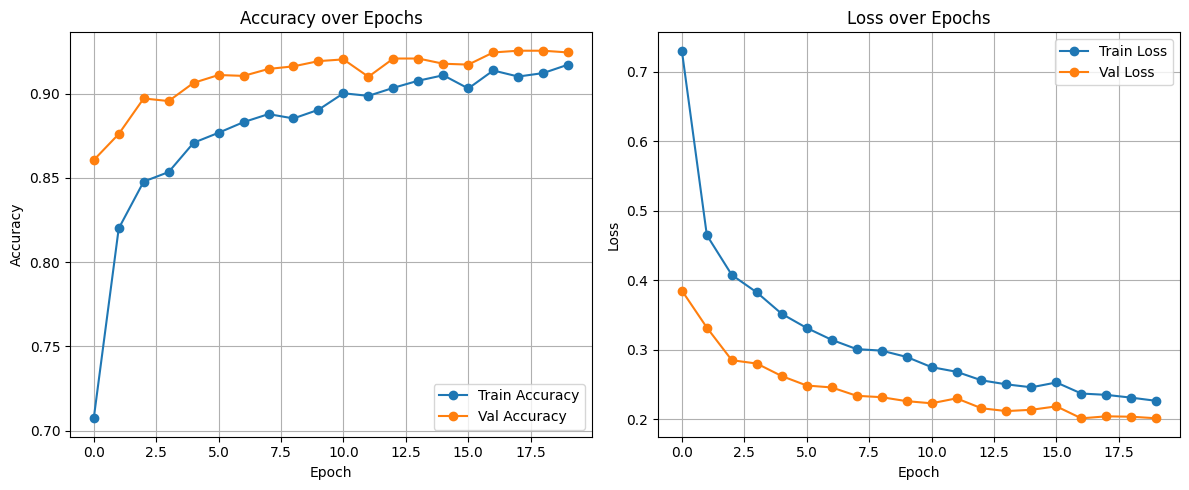

In [5]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [8]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict class probabilities
val_generator.reset()
pred_probs = model.predict(validation_set)
y_pred = np.argmax(pred_probs, axis=1)

# True labels
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step


## Reports

In [9]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))


Classification Report:

                          precision    recall  f1-score   support

      Apple___Apple_scab       0.27      0.28      0.27       504
       Apple___Black_rot       0.28      0.28      0.28       497
Apple___Cedar_apple_rust       0.25      0.26      0.25       440
         Apple___healthy       0.25      0.24      0.25       502

                accuracy                           0.27      1943
               macro avg       0.26      0.26      0.26      1943
            weighted avg       0.26      0.27      0.26      1943



## Confusion Matrix

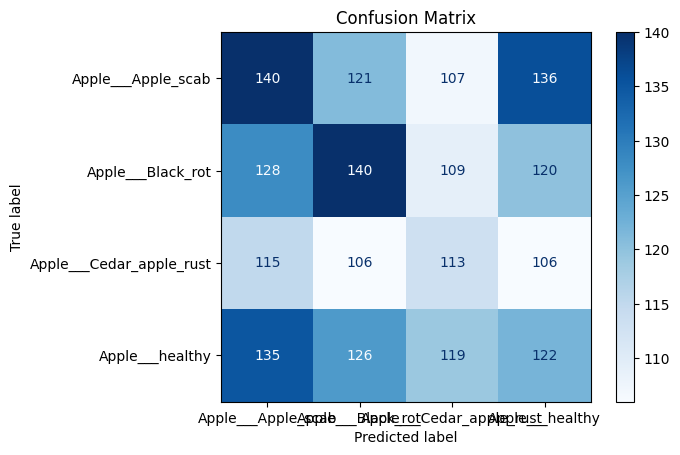

In [10]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import ConfusionMatrixDisplay


In [12]:
# Get predictions
val_generator.reset()
y_probs = model.predict(val_generator)  # shape: (num_samples, num_classes)
y_pred = np.argmax(y_probs, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# One-hot encode true labels for AUC and ROC
y_true_bin = label_binarize(y_true, classes=range(len(class_labels)))  # shape: (num_samples, num_classes)


61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step


##  Learning Curves (Accuracy & Loss)

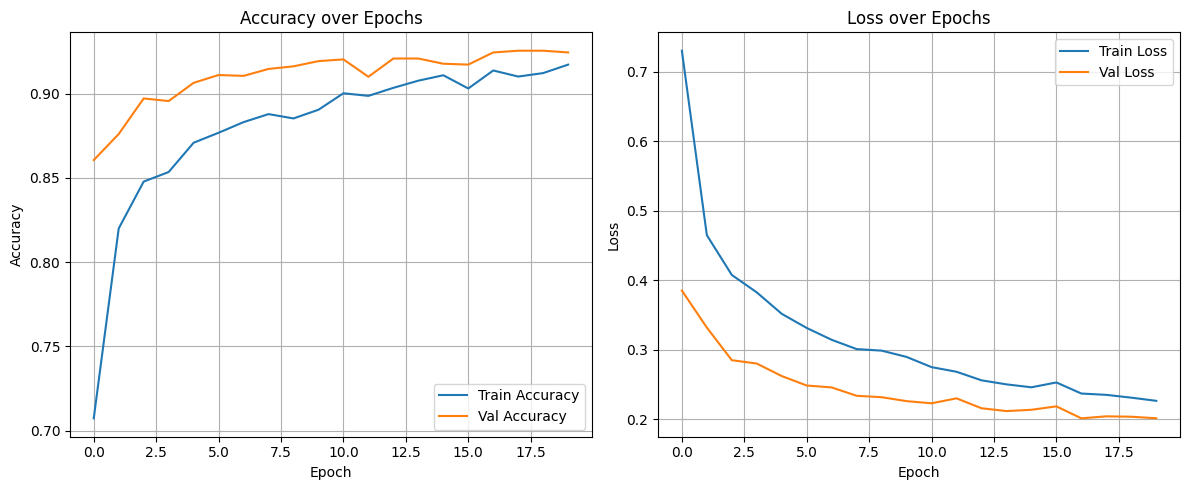

In [13]:
# Already using this if you saved history from model.fit
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


## ROC Curve & AUC (Multi-class)

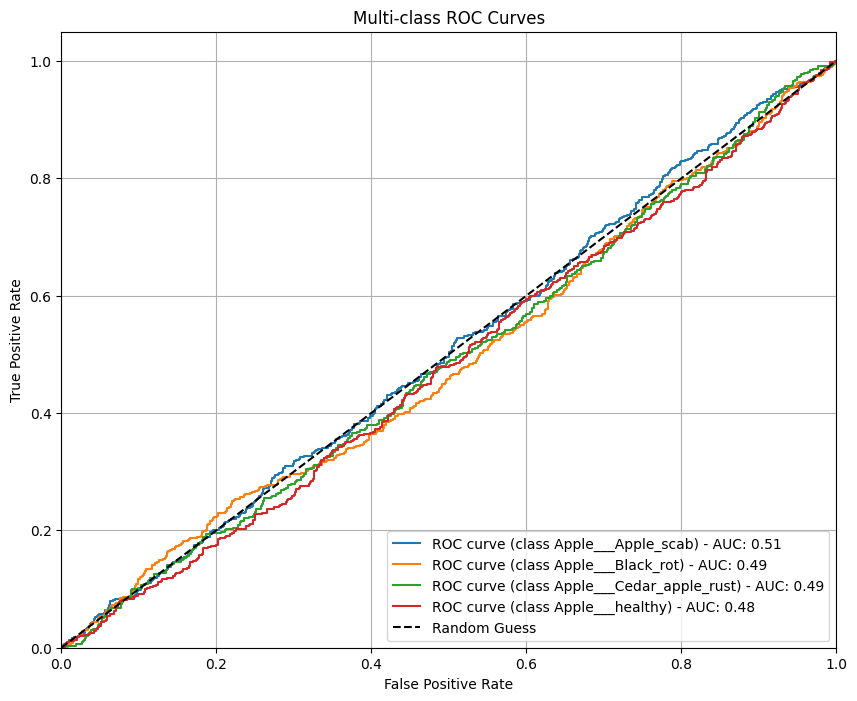

In [14]:
# Compute ROC and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {class_labels[i]}) - AUC: {roc_auc[i]:.2f}')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curves')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## Precision, Recall, F1-Score Report

In [15]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

Classification Report:

                          precision    recall  f1-score   support

      Apple___Apple_scab       0.23      0.03      0.05       504
       Apple___Black_rot       0.24      0.35      0.28       497
Apple___Cedar_apple_rust       0.21      0.16      0.18       440
         Apple___healthy       0.24      0.39      0.30       502

                accuracy                           0.23      1943
               macro avg       0.23      0.23      0.20      1943
            weighted avg       0.23      0.23      0.20      1943



## Confusion Matrix

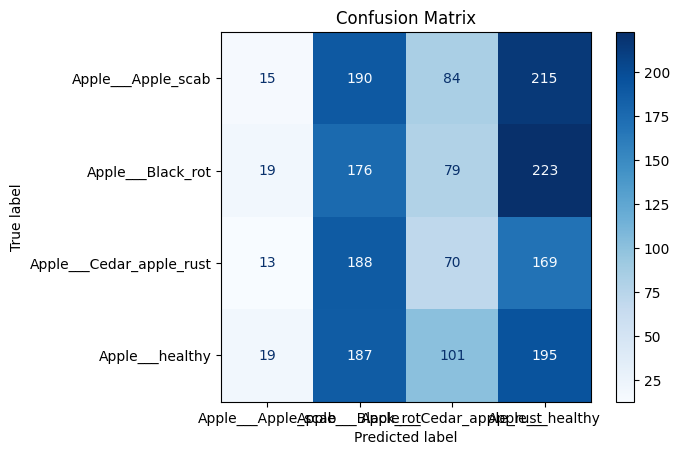

In [16]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

## Precision-Recall Curve for Each Class

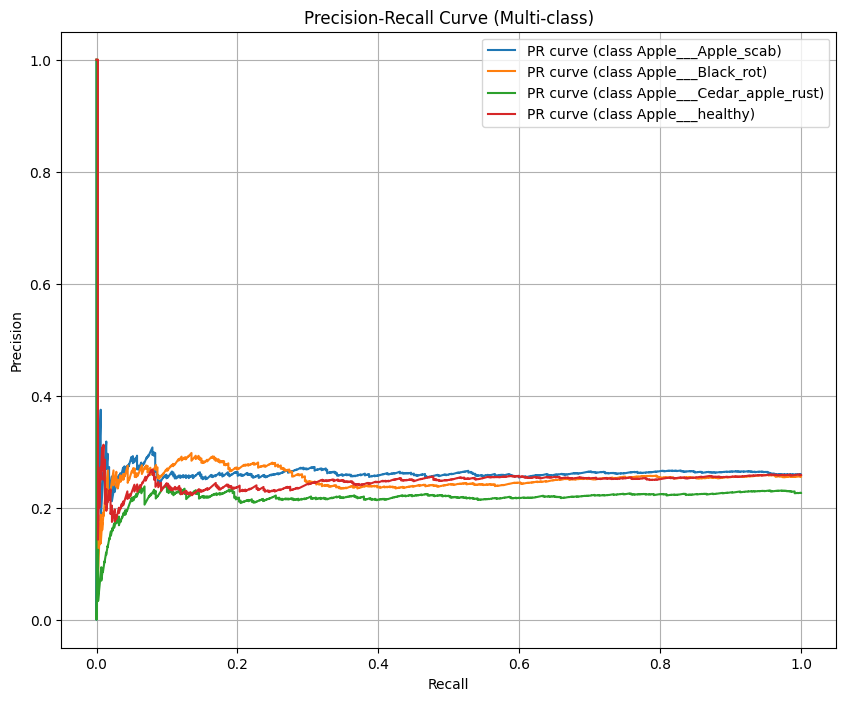

In [17]:
precision = {}
recall = {}

plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_probs[:, i])
    plt.plot(recall[i], precision[i], label=f'PR curve (class {class_labels[i]})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Multi-class)')
plt.legend()
plt.grid()
plt.show()


## Saving Model

In [18]:
model.save("mobilenetv2_model.h5")

## Using ResNet50 Model

In [19]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [ ]:
# Load ResNet50 without the top classifier layer
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers (you can unfreeze later for fine-tuning)
base_model_resnet.trainable = False

# Add custom classification layers on top
x = base_model_resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(4, activation='softmax')(x)  # 4 classes

model = Model(inputs=base_model_resnet.input, outputs=predictions)


In [20]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)


c:\Users\ajita\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 76s 301ms/step - accuracy: 0.4885 - loss: 2.1810 - val_accuracy: 0.8960 - val_loss: 0.3004
Epoch 2/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 76s 312ms/step - accuracy: 0.8640 - loss: 0.3750 - val_accuracy: 0.9362 - val_loss: 0.1887
Epoch 3/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 41s 171ms/step - accuracy: 0.9093 - loss: 0.2406 - val_accuracy: 0.9552 - val_loss: 0.1401
Epoch 4/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 41s 167ms/step - accuracy: 0.9230 - loss: 0.2044 - val_accuracy: 0.9532 - val_loss: 0.1436
Epoch 5/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 41s 168ms/step - accuracy: 0.9363 - loss: 0.1839 - val_accuracy: 0.9624 - val_loss: 0.1156
Epoch 6/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 40s 166ms/step - accuracy: 0.9495 - loss: 0.1427 - val_accuracy: 0.9593 - val_loss: 0.1099
Epoch 7/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 40s 164ms/step - accuracy: 0.9530 - loss: 0.1321 - val_accuracy: 0.9665 - val_loss: 0.0984
Epoch 8/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 41s 169ms/step - accuracy: 0.9565 - loss: 0

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, precision_recall_curve, roc_auc_score
from sklearn.preprocessing import label_binarize


In [22]:
# Get true and predicted values
val_generator.reset()
y_probs = model.predict(val_generator)  # Probabilities for each class
y_pred = np.argmax(y_probs, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# One-hot encode true labels for AUC and ROC
y_true_bin = label_binarize(y_true, classes=range(len(class_labels)))


61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step


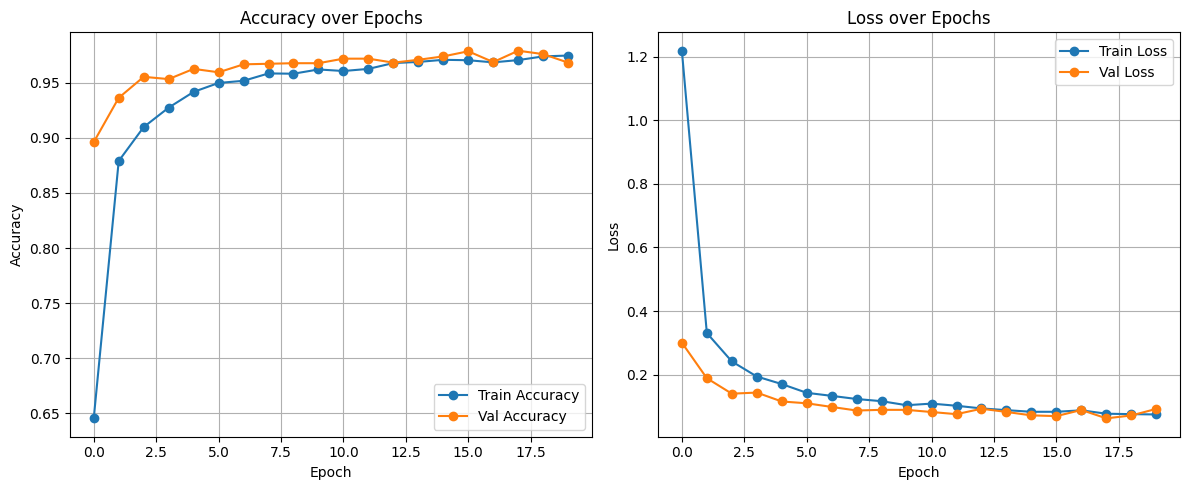

In [23]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [24]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))


Classification Report:

                          precision    recall  f1-score   support

      Apple___Apple_scab       0.25      0.24      0.24       504
       Apple___Black_rot       0.24      0.26      0.25       497
Apple___Cedar_apple_rust       0.21      0.21      0.21       440
         Apple___healthy       0.25      0.24      0.24       502

                accuracy                           0.24      1943
               macro avg       0.24      0.24      0.24      1943
            weighted avg       0.24      0.24      0.24      1943



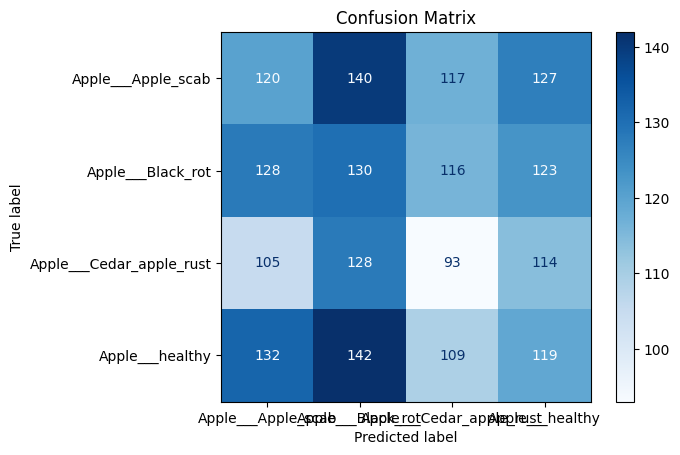

In [25]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


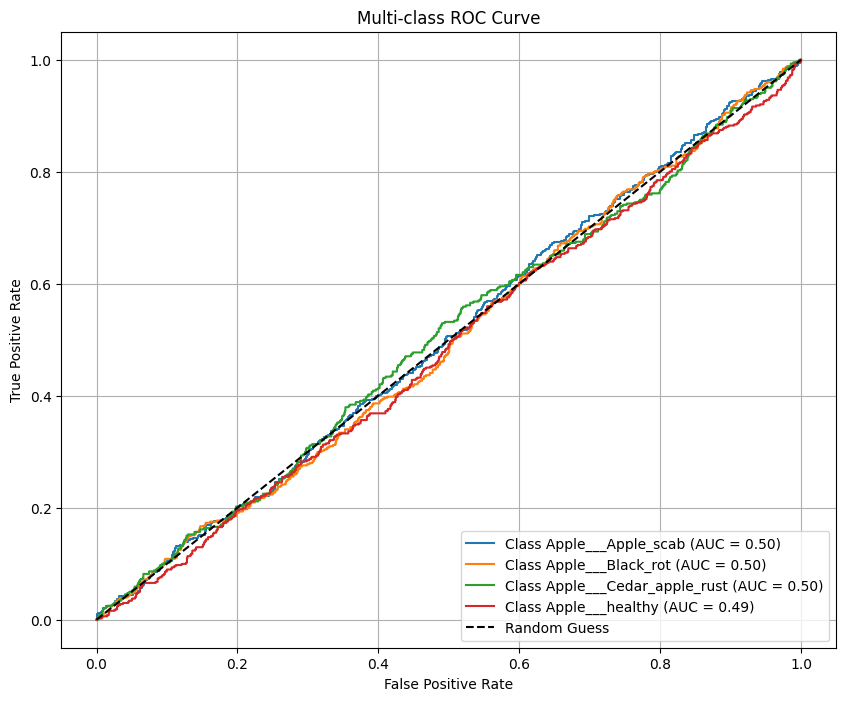

In [26]:
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {class_labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('Multi-class ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


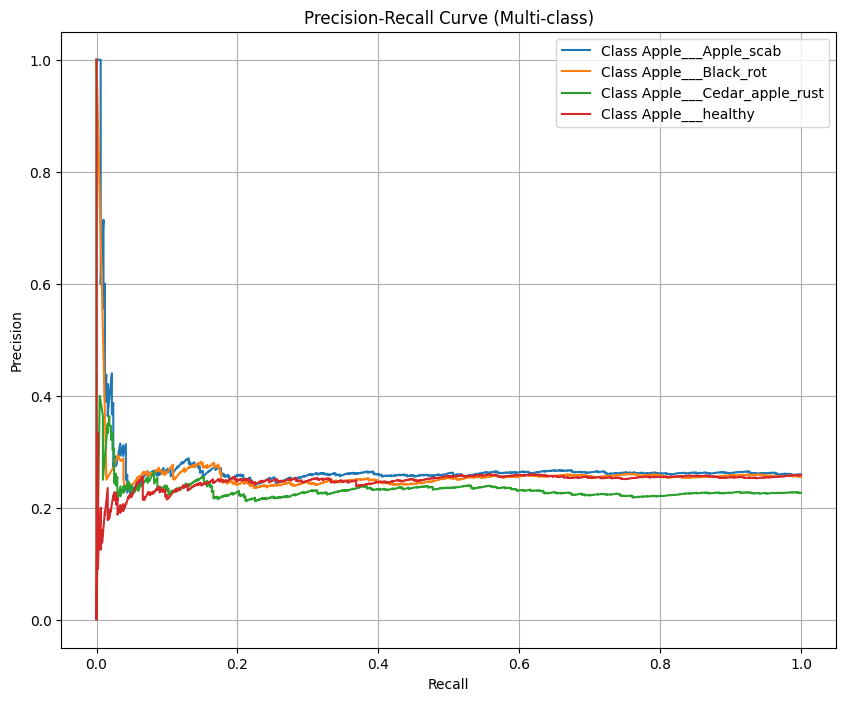

In [27]:
plt.figure(figsize=(10, 8))

for i in range(len(class_labels)):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_probs[:, i])
    plt.plot(recall, precision, label=f'Class {class_labels[i]}')

plt.title('Precision-Recall Curve (Multi-class)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()


In [28]:
macro_auc = roc_auc_score(y_true_bin, y_probs, average='macro')
print(f"\nMacro AUC Score: {macro_auc:.4f}")



Macro AUC Score: 0.4975


In [29]:
model.save('resnet50.keras')

## VGG 16 Model

In [30]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [34]:
# Load VGG16 without top classifier layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze base model layers to retain pretrained features
base_model.trainable = False

# Custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(4, activation='softmax')(x)  # 4-class output

# Final model
model = Model(inputs=base_model.input, outputs=output)


In [36]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)


Epoch 1/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.4910 - loss: 1.1749 - val_accuracy: 0.8204 - val_loss: 0.7367
Epoch 2/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 286s 1s/step - accuracy: 0.7593 - loss: 0.7303 - val_accuracy: 0.8471 - val_loss: 0.5462
Epoch 3/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 232s 957ms/step - accuracy: 0.8310 - loss: 0.5474 - val_accuracy: 0.8528 - val_loss: 0.4514
Epoch 4/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 235s 968ms/step - accuracy: 0.8540 - loss: 0.4597 - val_accuracy: 0.8765 - val_loss: 0.3878
Epoch 5/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 308s 1s/step - accuracy: 0.8773 - loss: 0.4004 - val_accuracy: 0.8909 - val_loss: 0.3432
Epoch 6/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 230s 949ms/step - accuracy: 0.8793 - loss: 0.3605 - val_accuracy: 0.8904 - val_loss: 0.3254
Epoch 7/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 237s 973ms/step - accuracy: 0.8850 - loss: 0.3399 - val_accuracy: 0.9048 - val_loss: 0.2948
Epoch 8/20
243/243 ━━━━━━━━━━━━━━━━━━━━ 238s 979ms/step - accuracy: 0.8871 - loss: 0.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, precision_recall_curve, roc_auc_score
from sklearn.preprocessing import label_binarize


In [38]:
# Get ground truth and predictions
val_generator.reset()
y_probs = model.predict(val_generator)
y_pred = np.argmax(y_probs, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Binarize true labels for multi-class ROC/AUC
y_true_bin = label_binarize(y_true, classes=range(len(class_labels)))


61/61 ━━━━━━━━━━━━━━━━━━━━ 45s 727ms/step


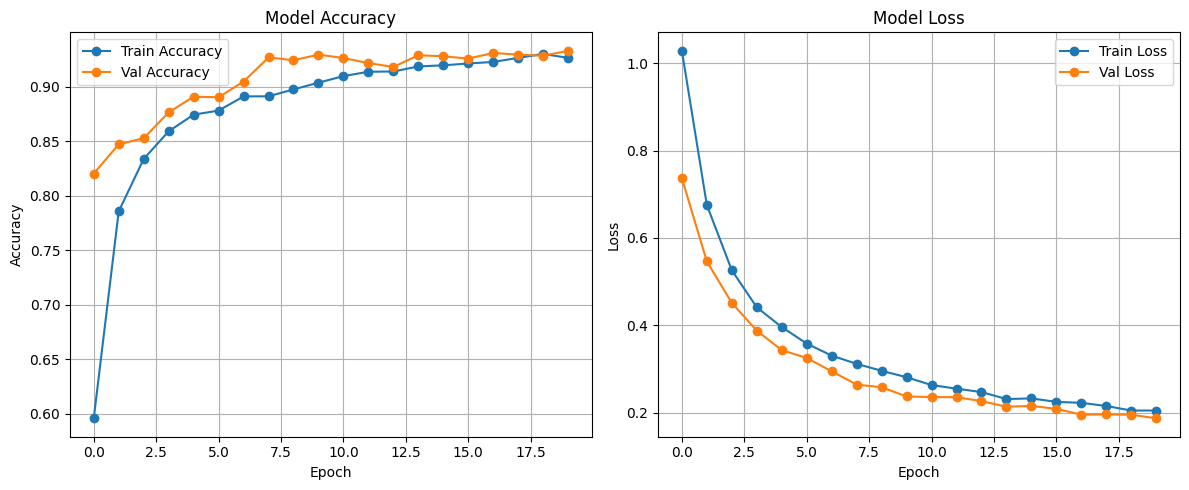

In [39]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [40]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))


Classification Report:

                          precision    recall  f1-score   support

      Apple___Apple_scab       0.23      0.20      0.21       504
       Apple___Black_rot       0.30      0.30      0.30       497
Apple___Cedar_apple_rust       0.20      0.22      0.21       440
         Apple___healthy       0.23      0.24      0.23       502

                accuracy                           0.24      1943
               macro avg       0.24      0.24      0.24      1943
            weighted avg       0.24      0.24      0.24      1943



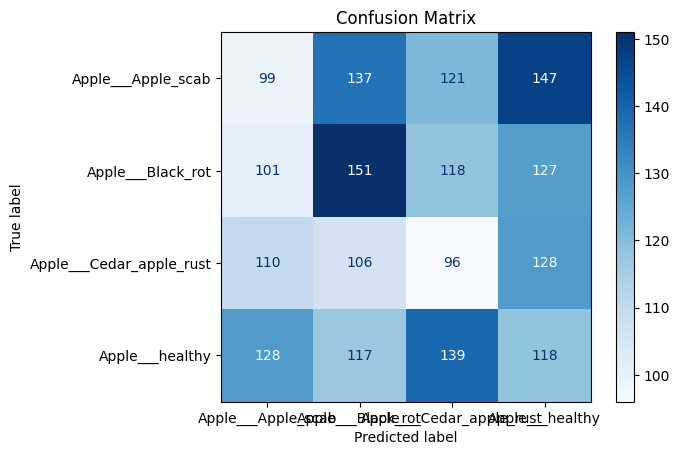

In [41]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


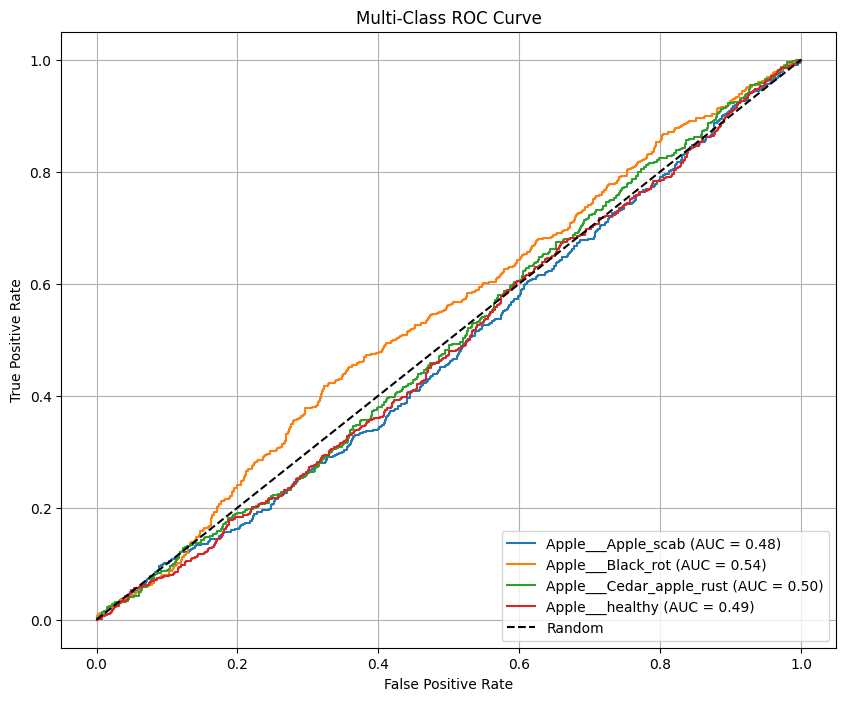

In [42]:
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"{class_labels[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [43]:
macro_auc = roc_auc_score(y_true_bin, y_probs, average='macro')
print(f"\nMacro AUC Score: {macro_auc:.4f}")



Macro AUC Score: 0.5005


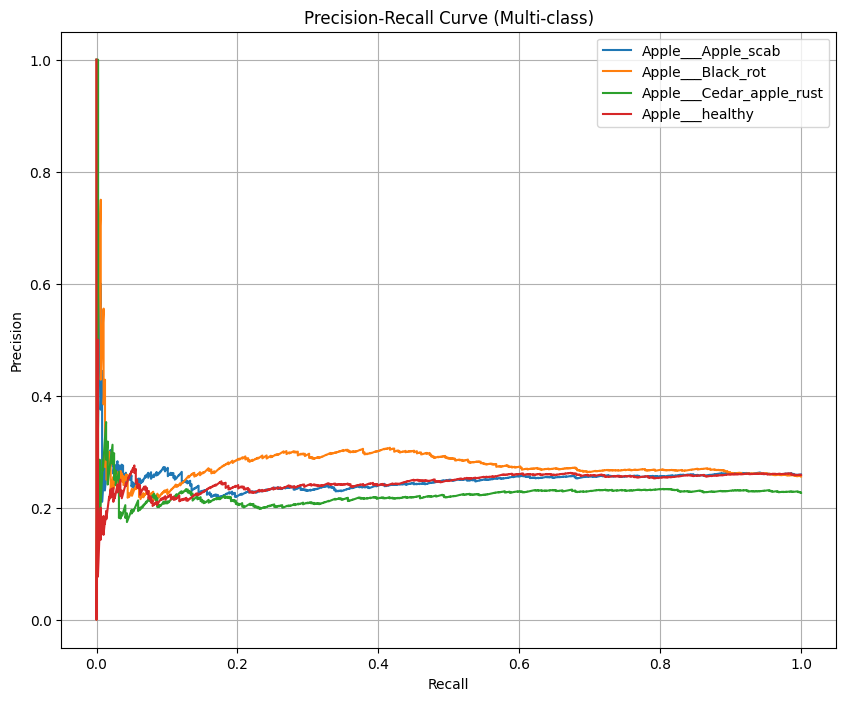

In [44]:
plt.figure(figsize=(10, 8))

for i in range(len(class_labels)):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_probs[:, i])
    plt.plot(recall, precision, label=f"{class_labels[i]}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Multi-class)')
plt.legend()
plt.grid()
plt.show()


In [45]:
model.save("vgg16.keras")

## Building Model

In [35]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [36]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [37]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [38]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [39]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [40]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [41]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [42]:
cnn.add(tf.keras.layers.Flatten())

In [43]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [44]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [45]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

### Compiling and Training Phase

In [46]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [47]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         6,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,791,728 (29.72 MB)

 Trainable params: 7,791,728 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

## Early Stopping

In [48]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [50]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=21, callbacks=[early_stopping])

Epoch 1/21
243/243 ━━━━━━━━━━━━━━━━━━━━ 113s 463ms/step - accuracy: 0.5728 - loss: 0.9457 - val_accuracy: 0.8163 - val_loss: 0.4869
Epoch 2/21
243/243 ━━━━━━━━━━━━━━━━━━━━ 116s 479ms/step - accuracy: 0.8600 - loss: 0.3756 - val_accuracy: 0.9326 - val_loss: 0.1810
Epoch 3/21
243/243 ━━━━━━━━━━━━━━━━━━━━ 119s 489ms/step - accuracy: 0.9237 - loss: 0.2044 - val_accuracy: 0.9671 - val_loss: 0.0973
Epoch 4/21
243/243 ━━━━━━━━━━━━━━━━━━━━ 238s 982ms/step - accuracy: 0.9534 - loss: 0.1303 - val_accuracy: 0.9614 - val_loss: 0.1073
Epoch 5/21
243/243 ━━━━━━━━━━━━━━━━━━━━ 222s 911ms/step - accuracy: 0.9614 - loss: 0.0984 - val_accuracy: 0.9588 - val_loss: 0.1266
Epoch 6/21
243/243 ━━━━━━━━━━━━━━━━━━━━ 122s 500ms/step - accuracy: 0.9747 - loss: 0.0719 - val_accuracy: 0.9640 - val_loss: 0.1103
Epoch 7/21
243/243 ━━━━━━━━━━━━━━━━━━━━ 121s 498ms/step - accuracy: 0.9617 - loss: 0.1135 - val_accuracy: 0.9825 - val_loss: 0.0510
Epoch 8/21
243/243 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - accuracy: 0.9866 - lo

## Evaluating Model

In [51]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

243/243 ━━━━━━━━━━━━━━━━━━━━ 29s 117ms/step - accuracy: 0.9983 - loss: 0.0064
Training accuracy: 0.9983271360397339


In [52]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.9895 - loss: 0.0301
Validation accuracy: 0.9897066354751587


### Saving Model

In [53]:
cnn.save('trained_plant_disease_model.keras')

In [54]:
training_history.history #Return Dictionary of history

{'accuracy': [0.7036417722702026,
  0.879809558391571,
  0.9330845475196838,
  0.9509715437889099,
  0.9664136171340942,
  0.9786385297775269,
  0.9706601500511169,
  0.9839145541191101,
  0.9828850626945496,
  0.9900913834571838,
  0.9800540208816528,
  0.9913781881332397,
  0.9916355609893799,
  0.9882897734642029,
  0.9927937388420105,
  0.9827563762664795,
  0.9897053241729736,
  0.9909921288490295],
 'loss': [0.7050426006317139,
  0.325079083442688,
  0.18760164082050323,
  0.14168167114257812,
  0.08856905251741409,
  0.06001711264252663,
  0.08508600294589996,
  0.04620484635233879,
  0.05176440253853798,
  0.027570514008402824,
  0.06153225526213646,
  0.025675801560282707,
  0.02372485026717186,
  0.0330151729285717,
  0.020643744617700577,
  0.05225108563899994,
  0.027300959452986717,
  0.02630087174475193],
 'val_accuracy': [0.8162634968757629,
  0.9325785040855408,
  0.9670612215995789,
  0.9613999128341675,
  0.9588265419006348,
  0.9639732241630554,
  0.9825012683868408,

In [55]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [56]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

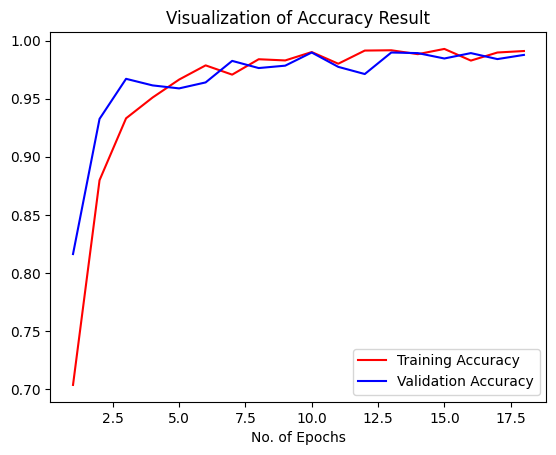

In [58]:
epochs = [i for i in range(1, len(training_history.history['accuracy']) + 1)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [59]:
class_name = validation_set.class_names

In [60]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1943 files belonging to 4 classes.


In [61]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1943/1943 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step


In [62]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [63]:
Y_true

<tf.Tensor: shape=(1943,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

In [64]:
predicted_categories

<tf.Tensor: shape=(1943,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

In [67]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [68]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                          precision    recall  f1-score   support

      Apple___Apple_scab       0.99      0.97      0.98       504
       Apple___Black_rot       1.00      1.00      1.00       497
Apple___Cedar_apple_rust       1.00      1.00      1.00       440
         Apple___healthy       0.98      0.99      0.98       502

                accuracy                           0.99      1943
               macro avg       0.99      0.99      0.99      1943
            weighted avg       0.99      0.99      0.99      1943



### Confusion Matrix Visualization

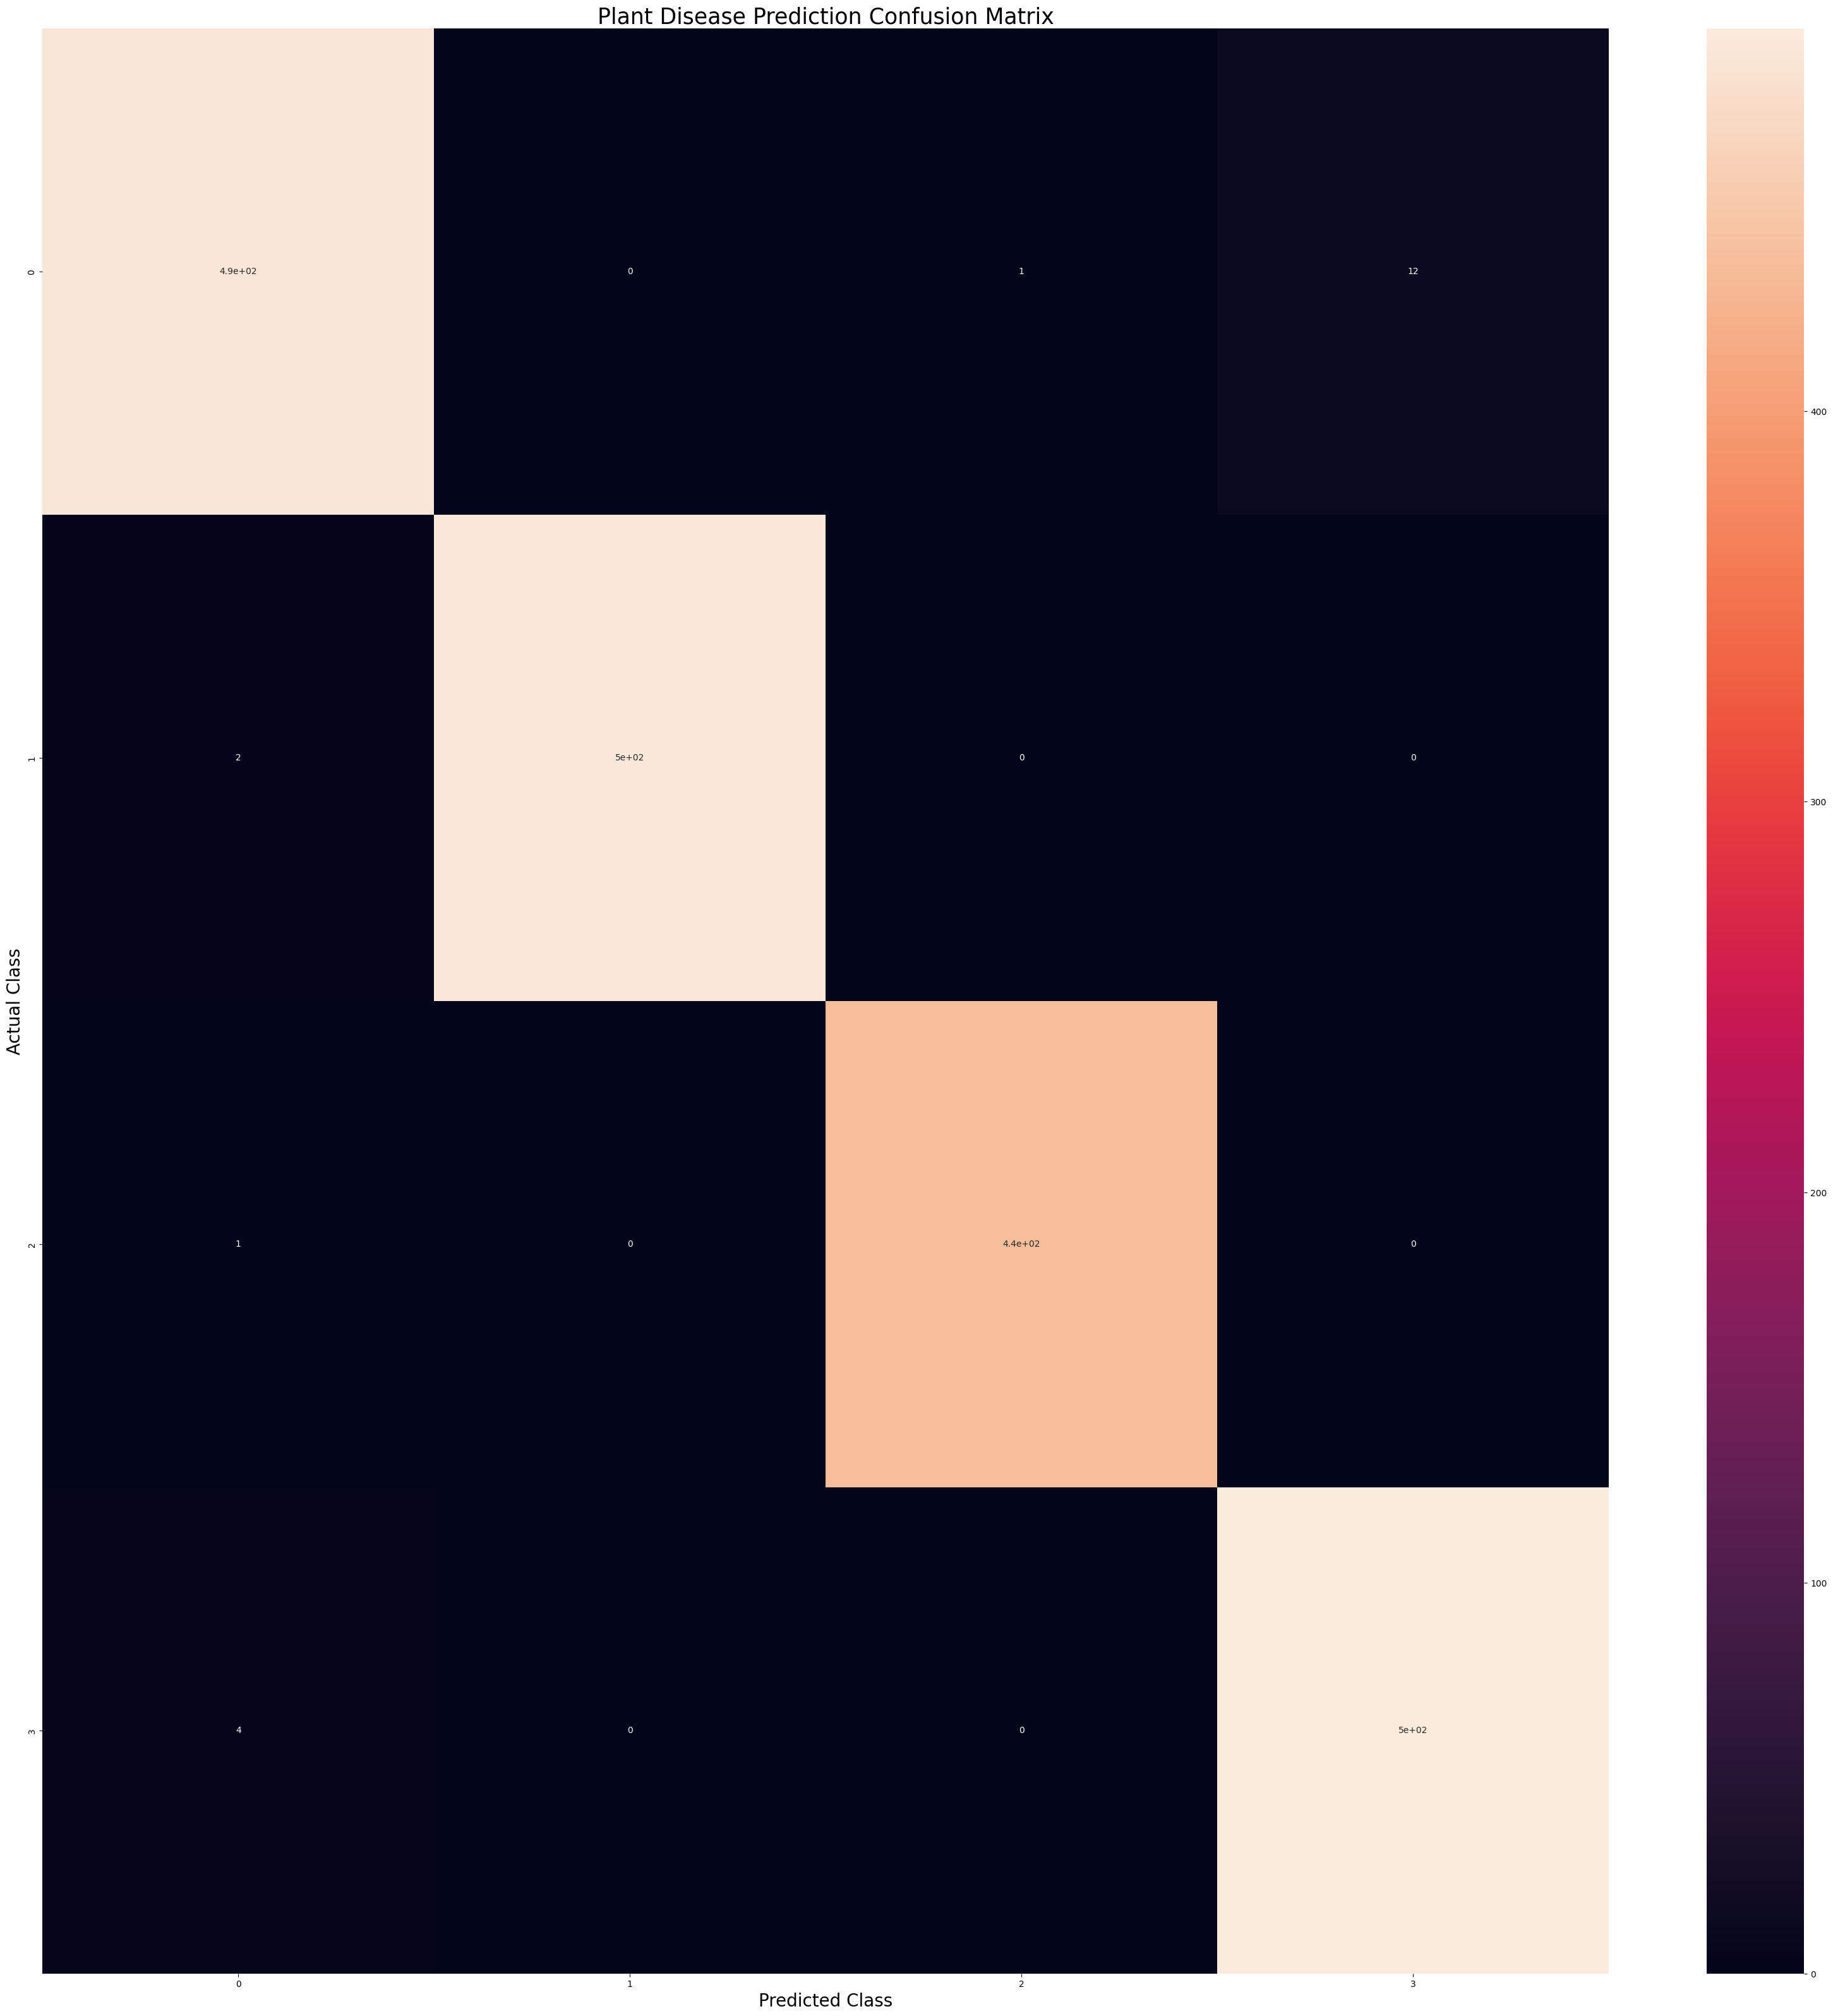

In [69]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()